# CS 237 Spring 2021, HW 12 

#### Due date: Friday April 30rd at Midnight (1 minute after 11:59pm on 4/30) via Gradescope (with a 6 hour grace period)

<strong> Late policy:</strong> You may submit the homework up to 24 hours late for a 10% penalty. Hence, the late deadline is Saturday 5/1 at Midnight (with a 6 hour grace period). 

#### General Instructions

Please complete this notebook by filling in solutions where indicated. 

For full credit, please take careful note of the following requirements:

- Do NOT use any HTML tags in your notebook, as Gradescope will ignore them;

- Do NOT answer questions by including images, as Gradescope will ignore them; and 

- You MUST  "Restart and Run All" from the Kernel menu before submitting to Gradescope.

- You must present all numbers in readable form (approximately 4 digits of precision) unless otherwise stated. 

**Any assignments which do not follow these requirements will not receive full credit.** 


There are 10 problems on this exam, 6 analytical, 3 lab problems (7, 8, and 9), and one
problem on Linear Regression, which we will cover in lecture on Tuesday, 4/27.  

In [1]:
# General useful imports
import numpy as np
from numpy import arange,linspace,mean, var, std, corrcoef, transpose, ones,log
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from numpy.random import seed,random, randint, uniform
import math
from collections import Counter
import pandas as pd
%matplotlib inline


from math import log, pi, log, floor, ceil, sqrt       # import whatever you want from math

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# Here are the basic statistical functions we will use from numpy

from numpy import mean, var, std, median

L = [2,4,3,6,4,5]

# mean value

mean(L)          


# Variance
#  ddof = delta degrees of freedom, default is 0

# population variance
var(L)      

# sample variance
var(L,ddof=1)

# Standard deviation
#  ddof = delta degrees of freedom, default is 0

# population standard deviation
std(L)      

# sample standard deviation
std(L,ddof=1)  

# Median

median(L)  

# Random sampling of `size` elements from list with or without replacement

np.random.choice(L,size=1,replace=True)
       
# Scipy statistical functions

from scipy.stats import norm, binom, expon, geom, poisson, gamma, nbinom, bernoulli,uniform                 

# https://docs.scipy.org/doc/scipy/reference/stats.html

#### Normal Distribution    #####

######   Note that in this library loc = mean and scale = standard deviation  #####

# Examples assume random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 10

# Probability Density Function    (really only useful for drawing the curve)
#  f(x) = P(X == x)

norm.pdf(x=50,loc=60, scale= 10)     

# Cumulative Density Function
#  F(x) = P(X < x)

# Example:  Percentage of houses less than 50K. 
norm.cdf(x=50,loc=60,scale=10) 

# Example:  Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

# Example:  Percentage of houses more than 50K.
norm.sf(x=50,loc=60,scale=10) 

# Percentage Point Function: Inverse of the CDF:
# For what is the largest value of k for which P( X < k ) = q  ?

# Example: What is the maximum cost of the 5% cheapest houses, 
# i.e., the x such that P(X < x) = 0.05?

norm.ppf(q=0.05,loc=60,scale=40)

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the smallest value of k for which P( X > k ) = q  ?

# Example: What is the minimum cost of the 5% most expensive houses, 
# i.e., the x such that P(X > x) = 0.05?

norm.isf(q=0.05,loc=60,scale=40)

#   Give the endpoints of the interval (centered on the mean)
#   which contain alpha/100 percent of the population (alpha is a probability)

# Ex. Give the interval for the middle 75% of the houses

norm.interval(alpha=0.75, loc=60, scale=40)

# generate a random variate
norm.rvs(loc=60, scale=40)

# generate random variates, returns list of length = size
norm.rvs(loc=60, scale=40, size=10)

#####   Exponential Distribution     ########

#####  loc = minimum value (leave at 0 always)               ##### 
#####  scale = mean = 1 / lambda (using textbook notation)   #####

# Probability Density Function  f(x)       (Only useful for graphing and showing shape)

lam = 4
expon.pdf(x=5,loc=0, scale=1/lam)        # Must use 'scale = 1/lambda' to be consistent with textbook and lecture  

# Cumulative Density Function
#  F(x) = P(X < x)

expon.cdf(x=5,loc=0,scale=1/lam) 

# Example:  Find P(6<X<8)
expon.cdf(x=8,loc=0,scale=1/lam) - expon.cdf(x=6,loc=0,scale=1/lam)

# Percentage Point Function: Inverse of the CDF:
# For which value of x does P( X < x ) = q  ?

expon.ppf(q=0.05,loc=0,scale=1/lam)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

expon.sf(x=5,loc=0,scale=1/lam) 

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the value of k for which P( X > k ) = q  ?

expon.isf(q=0.05,loc=0,scale=1/lam)

#g. generate a random variate
expon.rvs(loc=0, scale=1/lam)

#h. generate random variates, returns list of length = size
expon.rvs(loc=0, scale=1/lam, size=10)

## Uniform Distribution

uniform.rvs(0,1)     # from [0,1)
uniform.rvs(0,10)   # from [0,10)
uniform.rvs(0,1,size=100)



## DISCRETE DISTRIBUTIONS

##### Bernoulli Distribution  X ~ Bernoulli(p)  ####

#  p = probability of success for Bernoulli trial

# Generate a random variate
bernoulli.rvs(p=0.5)

# Generate a list of random variates
bernoulli.rvs(p=0.5,size=100)

##### Binomial Distribution  X ~ B(n,p)  ####

#  n = number of independent Bernoulli trials
#  p = probability of success for Bernoulli trial
#  k = outcome in range [0 .. n]

# Generate a random variate
binom.rvs(n=10, p=0.5)

# Generate a list of random variates
binom.rvs(n=10, p=0.5,size=100)

# Probability mass function.
binom.pmf(k=4, n=10, p=0.5)

# Cumulative distribution function
binom.cdf(k=4, n=10, p=0.5)

print() 

# Geometric distribution

geom.rvs(0.5)

geom.rvs(0.5,size=10)



# Uniform discrete random variates:

randint(2)          # one randome variate in {0,1}

randint(3,10,size=10)       # 10 random variates in [3,10) = [3,4,...,8,9]


# Calculate the covariance and correlation coefficient

def covariance(X,Y):
    return cov(X,Y)[0][1]

def rho(X,Y):
    return corrcoef(X,Y)[0][1]

def R2(X,Y):
    return corrcoef(X,Y)[0][1] ** 2


# Round to 2 decimal places
def round2(x):
    return np.around(x,2)

# Round to 4 decimal places
def round4(x):
    return np.around(x,4)

def probToPercent(p):
    pc = p*100
    if round(pc) == pc:
        return str(round(pc)) + "%"
    else:
        return str(round(pc,2))+ "%"
    
import matplotlib.gridspec as gridspec

def display2DScatterAndMarginals(x,y,titl="Scatterplot of (X,Y)"):
    fig = plt.figure(figsize=(12,12))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    gs = gridspec.GridSpec(3, 3)
    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

    ax_main.scatter(x,y,marker='.',)
    #ax_main.set(xlabel="X", ylabel="Y")
    ax_main.set_title(titl,fontsize=12)
    ax_main.set_ylabel("Y",rotation=0,fontsize=14)
    ax_main.set_xlabel("X",rotation=0,fontsize=14)

    ax_xDist.hist(x,bins=100,align='mid',edgecolor='black')
    ax_xDist.set(ylabel='count')
    ax_xDist.set_title('X')

    ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid',edgecolor='black')
    ax_yDist.set(xlabel='count')
    ax_yDist.set_title('Y')

    plt.show()
    
def drawHeatMap(X,Y,titl="Heatmap of (X,Y)"):
    fig = plt.figure(figsize=(12,12))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    gs = gridspec.GridSpec(3, 3)
    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
    A = [[0 for i in range(max(X)+1)] for j in range(max(Y)+1)]
    
    for k in range(len(X)):
        A[Y[k]][X[k]] +=1       

    ax_main.imshow(A, cmap='hot', origin='lower',interpolation='nearest')

    #ax_main.scatter(x,y,marker='.',)
    #ax_main.set(xlabel="X", ylabel="Y")
    ax_main.set_title(titl,fontsize=12)
    ax_main.set_ylabel("Y",rotation=0,fontsize=14)
    ax_main.set_xlabel("X",rotation=0,fontsize=14)
    xbins = np.linspace(min(X)-0.5,max(X)+0.5,(max(X)-min(X)+2))
    ax_xDist.hist(X,bins=xbins,width=1.0,edgecolor='black')
    ax_xDist.set(ylabel='count')
    ax_xDist.set_title('X')
    
    ybins = np.linspace(min(Y)-0.5,max(Y)+0.5,(max(Y)-min(Y)+2))
    ax_yDist.hist(Y,bins=ybins,orientation='horizontal',align='mid',edgecolor='black')
    ax_yDist.set(xlabel='count')
    ax_yDist.set_title('Y')

    plt.show()
 
    
def draw_3D_scatter(X1,Y1,Z1,labels=['X','Y','Z'], reference=True, rot= -60):

    if reference:
        hiX = hiY = hiZ = 1.0
        loX = loY = loZ = -1.0
    else:
        loX = min(X1)
        hiX = max(X1)
        loY = min(Y1)
        hiY = max(Y1)
        loZ = min(Z1)
        hiZ = max(Z1)

    # make the X,Y grid

    X = np.linspace(loX, hiX, 100)
    Y = np.linspace(loY, hiY, 100)
    X, Y = np.meshgrid(X, Y)

    # Draw the figure

    fig = plt.figure(figsize=(14,12))
    ax = fig.gca(projection='3d')
    ax.view_init(elev=20, azim=rot)         # <==  set viewing angle here
    ax.set_xlim(loX, hiX)
    ax.set_ylim(loY, hiY)
    ax.set_zlim(loZ, hiZ)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])

    if reference:
        lim = 1.0
#         plot reference grid
#         planes
        ax.plot_surface(X, Y, np.zeros((100,100), dtype=int), alpha=0.1)
        ax.plot_surface(X, np.zeros((100,100), dtype=int), Y, alpha=0.1)
        ax.plot_surface(np.zeros((100,100), dtype=int), X, Y, alpha=0.1)
#         lines
        ax.plot([0,0],[0,0],[-lim,lim],c='k', alpha=0.5)
        ax.plot([0,0],[-lim,lim],[0,0],c='k', alpha=0.5)
        ax.plot([-lim,lim],[0,0],[0,0],c='k', alpha=0.5)
#     origin point
        ax.scatter([0],[0],[0])

    # plot the random points

    ax.scatter(X1, Y1, Z1, color='b',marker='.')

    plt.show()
    
    
def draw_3D_histogram(Xdata,Ydata,limit=21):
    
    # create histogram from X, Y data
    
    A = [[0 for i in range(limit)] for j in range(limit)]
    
    for k in range(len(Xdata)):
        A[Xdata[k]][Ydata[k]] +=1  
        
    # now create data for bars
    
    X = []
    Y = []
    Z = []
    
    for i in range(limit):
        for j in range(limit):
            if A[i][j] > 0:
                X.append(i)
                Y.append(j)
                Z.append(A[i][j])
    
       
    # setup the figure and axes
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.view_init(30, 60)

    bottom = np.zeros_like(Z)

    ax.set_title('3D Histogram')

    ax.set_xlim((0,limit))
    ax.set_ylim((0,limit))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Frequency')
    
    ax.bar3d(X, Y, bottom, 1, 1, Z)

    plt.show()

    
    
# Draw scatterplot for bivariate data and draw linear regression line
# with midpoint (mux,muy)
    
def LinearRegression(X,Y,titl="Linear Regression", xlab="X",ylab="Y"):

    n = len(X)
    
    # basic 
    mux = mean(X)
    muy = mean(Y)
    sdx = std(X)
    sdy = std(Y)
        
    r = rho(X,Y)
    
    r2 = r**2
       
    m = r * sdy / sdx
    b = muy - m*mux
    
    # Predicted values from regression line
    
    Yhat = [(m*X[i]+b) for i in range(n)]
    
    # Residuals
    
    E = [(Y[i] - Yhat[i]) for i in range(n)]
    
    # residual sum of squares -- deviations of data from line
    rss = sum( [ e**2 for e in E])
    
    # explained sum of squares -- deviation of line from mean of y
    egss = sum( [ (Yhat[i] - muy)**2 for i in range(n)])
    
    # total sum of squares -- deviation of data from mean of y
    tss = sum( [ (Y[i] - muy)**2 for i in range(n)] )
     
    # alternate way to compute r^2 statistic
    
    #r2 = regss / tss
    
    plt.figure(figsize=(10,10))
    plt.grid()
    
    linex = [min(X),max(X)]
    liney = [(m*x+b) for x in linex]

    plt.scatter(X,Y,label='Data')
    plt.plot(linex,liney,'r--',label='Trendline')
    plt.scatter([mux],[muy],label='Midpoint')           # add diamond shape?  'rD'
    plt.title(titl,fontsize=16)
    plt.legend()
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.show()
    
    plt.figure(figsize=(10,4))
    plt.title("Graph of Residuals",fontsize=14)
    plt.grid()
    plt.xlabel(xlab)
    plt.ylabel("Y = Residuals")
    Yhat = [0 for x in X ]
    plt.scatter(X,E)
    plt.plot(X,Yhat,color='red')
    plt.show()



    print("\nmean(x):\t" + str(round4(mux)) + "\tstd(x):\t" + str(round4(sdx)))
    print("mean(y):\t" + str(round4(muy)) + "\tstd(y):\t" + str(round4(sdy)))
    print("\nrho:   " + str(round4(r)) + "\tR^2:   " + str(round4(r2)))
    print("\nResidual SS:   " + str(round4(rss)) + "\tExplained SS: " + str(round4(egss)) + "\tTotal SS:   " + str(round4(tss)))    
    
    if(b >= 0):
        print("\nRegression Line: y = " + str(round4(m)) + " * x + " + str(round4(b)))
    else:
        print("\nRegression Line: y = " + str(round4(m)) + " * x - " + str(round4(-b)))       


    
data_url = "http://www.cs.bu.edu/fac/snyder/cs237/Homeworks,%20Labs,%20and%20Code/Data/"

## Problem One (Exponential)

In the following assume that we are dealing with Poisson processes and can use the exponential distribution.

(A) Suppose that every three months , on average, an earthquake occurs in
California. What is the probability that the next earthquake occurs after three but before
seven months?

(B) Suppose we model time to failure of TV tubes as an exponential random variable and that tubes fail on average after 10 years. 
If Jim bought his TV set 10 years ago, what is the probability that its tube
will last another 10 years?

Hint: Make sure in both these you understand the difference between the rate parameter $\lambda$ (= mean number of arrivals per unit time) and $\beta \,=\, 1/\lambda$ (= mean interarrival time). 

**Solution:**

## Problem Two (Poisson Distribution)

The atoms of gram of Uranium 237 are disintegrating randomly with an average rate of 3.9 alpha particles per second. 

What is the probability that in the next second, the number
of alpha particles emitted is

(A) Exactly 4?

(B)  At least 2?

(C) Between 3 and 6 (inclusive)?

Now consider:

(D) What is the probability that for a period of five seconds, there are no emissions?

(E) Suppose for a period of five seconds there are no emissions.  What is the probability that there are at least 2 emissions in the next second following this period? 

**Solution:**


## Problem Three (Poisson compared with Exponential)

Suppose the emergency room at Mass General opens at 6am and has a mean arrival rate throughout the day of 6.9 patients per hour (that is<span> &lambda;</span> = 6.9). </p>
<p>(A) What is the probability that 12 patients arrive between 6am and 7am?</p>
<p>(B) What is the probability that no patient arrives before 7am?</p>
<p>(C) What is the probability that<span> the first</span> patient arrives between 6am and 7am? </p>
<p>(D) What is the probability that<span> the first</span> patient arrives between 6:15 and 6:45? </p>
<p>(E) Suppose it is 6:15 and no patient has arrived yet; now what is the probability that<span> the first</span> patient arrives between 6:15 and 6:45? </p>
<p>Hint: Use the Poisson for (A) and (B) and the Exponential for (C), (D), and (E).  
Note carefully how (D) and (E) are different: in (D) it is possible that the first patient arrives between 6am and 6:15am, whereas for (E) you know this has not happened. 
The result for the two will be different!

</p>

**Solution:**

## Problem   Four  (Joint Random Variables)

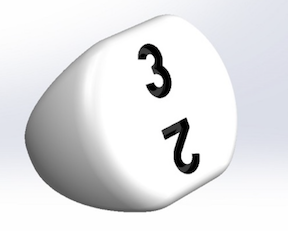

Suppose we roll two three-sided dice (having sides with 1, 2, or 3 dots showing, or with numbers as shown above). Let $X$ indicate the sum of the dots/numbers on the two dice, and $Y$ indicate the absolute value of the difference in the dots/numbers showing on each die.   For example, if the first die lands 2 and the second die lands 1, then X would return 3 and Y would return 1. 

(A) Calculate the joint probability mass function for $(X,Y)$ and show marginal probabilities for $X$ and $Y$. 

Show your results in some suitable form using a matrix drawn in text or using Markdown tables, as shown in the Markdown Tutorial posted on the class web site (the section on tables is at the very end).  Use the format
shown in the lecture slides for Lecture 21 as a model for how to present your results.

DO NOT include an image file, as we can not view it in Gradescope. 

(B) Calculate $E(X)$, $\sigma_X$, $E(Y)$, and $\sigma_Y$. 

(C) Calculate $Cov(X,Y)$ and the correlation coefficient $\rho_{X,Y}$.

(D) Are these two random variables independent? (Answer Yes or No and explain briefly.) 


**Solution:**

## Problem Five   (Independent Joint Random Variables)

From an ordinary deck of 52 cards, 8 cards are drawn at random and without replacement. Let $X$ and $Y$ be the number of clubs and the number of spades, respectively. Are $X$ and $Y$ independent?

Hint: Rather than draw out the whole matrix, just use the fact that $X$ and $Y$ are independent iff

$$P(X\,\vert\, Y = k ) = P(X)\quad\text{for all $k$, }\ 0\le k\le 8.$$

Investigate whether this is true for various values of $k$, starting with $k=8$. OR, just check these cells in the matrix and see if you can find a counter-example. 

**Solution:**

# Lab Problems (6, 7, and 8)

The lab problems will use various display functions given in the first code cell of this document. 

## Problem Six --  Scatterplots of Continuous Bivariate Data

First we will consider how to create *scatterplots* of random data in 2D dimensions, starting with continuous data points. We will use points from the uniform distribution over [0..10), and also the normal and exponential. 

### Part A

Apply the function `display2DScatterAndMarginals` to create a scatterplot of $10^4$ random points (x,y) uniformly distributed over the range $[0,10)\times [0,10)$ using the function:

>      uniform.rvs(lower_bound,upper_bound, size=num_trials).


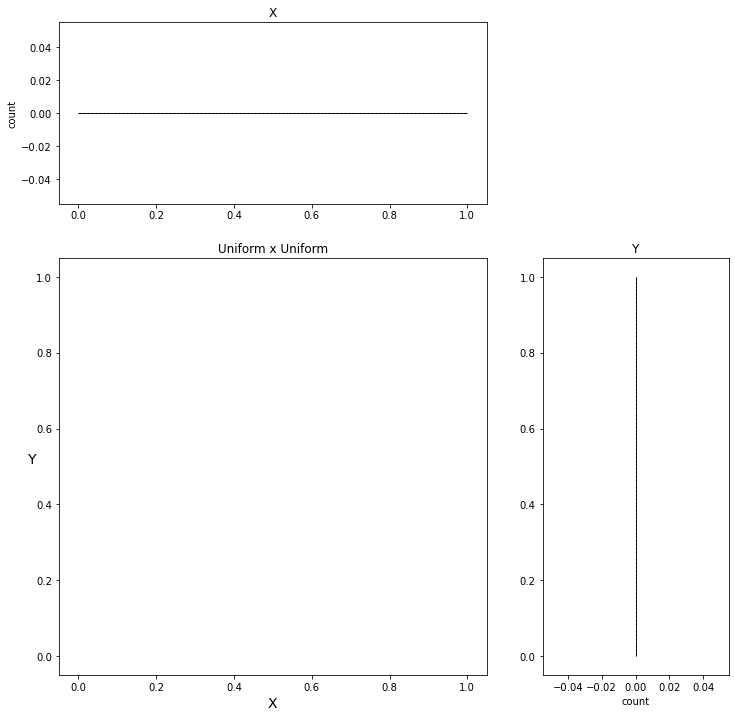

In [2]:
# (a)  

seed(0)

num_trials = 10**4

X = [] # Your code here
Y = [] 

display2DScatterAndMarginals(X,Y,'Uniform x Uniform')


## Part B

Do the same thing for normally-distributed points using 


>            norm.rvs(mu,sigma,size=num_trials)

Plot a *standard* normal on each axis. 

In [3]:
# (b)  

seed(0)

num_trials = 10**4

# Your code here

## Part C

Now use the exponential distribution Exp(lam=3) for the x axis and uniform(0,1) for the y axis. Again, you will need to use the following for the exponential:

>           expon.rvs(0,1/lam,size=num_trials)
                 


In [4]:
# (c)  

seed(0)

num_trials = 10**4

# Your code here

## Part D -- Be Creative

Choose two marginal distributions and display the result. Play around
with this a bit, including the parameters to the various distributions, to see what the possibilities are!  Give as your solution
one that you find interesting and/or attractive. 

In [5]:
seed(0)

num_trials = 10**4

# Your code here

## Problem Seven -- Heatmaps of Discrete Bivariate Data

Plotting random discrete data is a bit different, as we can't just plot the points, because
we have no obvious way to show when more than one value is plotted to the same point.
Therefore, we have to use some kind of histogram to show the frequencies
in each "bin," except that now we have an additional dimension.

A <b> heatmap</b> is a histogram which lays out the bins in a 2D matrix, and shows the frequency
by color: in our case, brighter colors indicate higher frequencies. 

We will try different distributions on each axis, as in the last problem, using the the 
discrete uniform, binomial, and geometric. These are the discrete analogues of the distributions in the previous problem, and you should try to see the correspondence. 

For heatmaps we need a fixed range of values, so we will need in each case to
have values in the range [0,20]. 

The function `drawHeatMap` is given in the first cell. 

## Part A

As in the previous problem, you will generate X and Y data values, but in this case you will use

                 randint(21)
                 
to generate num_trials integer variates in the range [0..20] for both the X and Y axes, 
and using the function `drawHeatMap`. 

In [6]:
# (a) 

seed(0)

num_trials = 10**4

#  Your code here

## Part B

Do the same thing, but using 

>          binom.rvs(20,0.5)

for the X axis and

>          binom.rvs(20,0.7)

for the Y axis. 
                 

In [7]:
# (b) 

seed(0)
num_trials = 10**4

#  Your code here

## Part C

Once more, but using 

             geom_rvs(p)
             
which is defined below, to make sure the values are in the range [0,20]

Use $p=0.4$ for the X axis and $p=0.2$ for the Y axis. 

In [8]:
def geom_rvs(p=0.5,size=1000):
    res = []
    for k in range(size):
        x = geom.rvs(p)
        while (x > 20):
            x = geom.rvs(p)
        res.append(x)
    return res
    

seed(0)

num_trials = 10**4

#  Your code here


## Part D -- Be Creative


Play around with various possibilities, and display something
you find interesting, with at two different distributions on
the two axes. 

In [9]:
# (d) 
seed(0)

num_trials = 10**4

#  Your code here


## Problem Eight -- Display of Discrete Bivariate data in 3D

An alternative to the heatmap is to draw discrete bivariate data in "faux 3D" where the perspective gives the
idea of real 3D data. Sophisticated drawing programs will allow the user to rotate the view in real time, but for now
we will simply explore a simple 3D framework in Matplotlib from a single perspective. 

## Part A

Repeat the previous problem with the same data, but using the function  `draw_3D_histogram`. 

In [10]:
seed(0)

num_trials = 10**4

#  Your code here

## Part B

Repeat the previous problem with the same data, but using a 3D histogram.

In [11]:
seed(0)
          
num_trials = 10**4

#  Your code here

## Part C

Repeat the previous problem with the same data, but using a 3D histogram.

In [12]:
seed(0)

num_trials = 10**4

#  Your code here

## Part D -- Be Creative!

Repeat the previous problem with the same data, but using a 3D histogram. You may do the same exact thing or try something different!

In [13]:
seed(0)

num_trials = 10**4

#  Your code here

## Problem Nine -- Plotting 3D data in 3D

Finally, we will explore the use of 3D scatterplots to display continuous data. We will choose a volume which is 2 units on a size, with the origin in the center, so the 8 corners will be (1,1,1), (1,1,-1), and so on. 

We will use the function `draw_3D_scatter` provided in the first code cell. 


## Part A

First, plot 3D data with a uniform distribution along each axis, so for each
of X, Y, and Z, use:

            uniform.rvs(size=num_trials)
            
using the function `draw_3D_scatter`. 
            
Now try shifting to the center: 

            uniform.rvs(size=num_trials) - 1/2
            
Notice how the range of the uniform value affects where they end up in 3D. 

Finally, plot 3D data with a uniform distribution along each axis, scaled and shifted into the range [-1..1]:

            2*uniform.rvs(size=num_trials) - 1
    
Submit only the last graph.     

In [14]:
seed(0) 
num_trials = 10**4
   
# Your code here

## Part B

Now plot 3D data with the normal distribution along each axis, using

            norm.rvs(0,sigma,size=num_trials) 
    
for various sigmas between 0.01 and 1.0.    

Submit the one that gives the best illustration of the 2D normal (your choice!). 

In [15]:
seed(0) 
num_trials = 10**4

# Your code here

## Part C

Now plot 3D data with the exponential distribution along each axis, but shifted so that it
starts in the "front corner" of the cube:

            expon.rvs(0,1/lam,size=num_trials)-1
        
You will need to explicitly create a list of num_trial variates for this one (you can't use the size parameter, because of the shifting).

Try various lam values, between 1/2 and 10, and submit the one that gives
the "best" illustration of exponential variation in 3 dimensions. 
    

In [16]:
seed(0) 
num_trials = 10**4

# Your code here

## Part D

Now try your own, mixing the three distributions. 


In [17]:
seed(0) 
num_trials = 10**4
   
# Your code here

## Student Data

For problem 10, we will use this data set, which contains homework, midterm, and GPA values
for a BU class which shall remain nameless (not this term)!

We are only going to use the HWS and GPA scores, but
take a look at the 3D graphs of this data before you proceed!

In [18]:
HWS = [
   89.39, 72.63, 61.55, 97.53, 93.27, 78.59, 94.79, 82.19, 83.9, 77.27, 
   58.23, 74.14, 91.95, 33.52, 71.02, 91.85, 88.54, 80.68, 91.95, 59.75, 
   19.69, 51.04, 84.18, 63.73, 85.6, 80.11, 81.15, 45.36, 69.03, 78.97, 
   90.62, 82.57, 79.92, 84.84, 83.52, 49.33, 82.57, 84.84, 82.38, 67.14, 
   53.69, 89.67, 82.57, 71.97, 75.94, 82.29, 96.02, 80.3, 89.77, 94.5, 
   59.37, 92.7, 74.14, 89.96, 24.33, 91.09, 82.76, 88.54, 88.54, 63.44, 
   90.72, 31.81, 64.96, 74.52, 64.39, 44.79, 94.69, 80.2, 83.9, 49.24, 
   64.2, 59.56, 75.09, 73.86, 80.68, 87.69, 40.91, 81.53, 87.02, 88.92, 
   58.61, 15.91, 80.2, 79.35, 40.34, 91.57, 82.38, 76.7, 72.25, 70.55, 
   80.49, 68.18, 82.67, 81.25, 91.57, 84.18, 76.89, 77.93, 91.76, 56.81, 
   85.79, 38.54, 85.13, 43.84, 92.8, 58.23, 70.92, 90.62, 82.95, 84.37, 90.62, 32.77]
MID = [
94.0,91.0,89.0,98.0,97.0,89.0,100.0,92.5,96.0,97.0,77.5,76.0,92.0,75.0,82.5,
95.0,91.5,98.0,93.0,78.0,66.5,67.5,97.0,81.0,99.0,79.0,97.0,90.0,66.0,
93.0,91.0,70.0,97.0,85.5,89.5,96.0,88.5,78.0,87.0,0.0,71.5,73.5,97.0,
79.5,88.0,84.5,96.0,96.0,99.0,90.0,94.0,100.0,93.5,98.0,80.0,90.0,91.0,
96.0,89.0,85.0,96.0,81.5,100.0,92.0,81.0,94.0,92.0,91.5,99.0,91.0,80.0,
77.5,74.0,77.0,91.5,92.0,91.0,98.0,93.0,99.0,90.0,76.0,75.0,85.0,72.5,
98.0,83.0,65.0,94.5,85.0,84.0,89.0,82.5,84.5,97.0,89.0,78.0,86.0,96.0,
90.0,84.5,90.0,87.0,89.0,74.5,60.0,74.5,90.0,91.0,92.0,93.0,65.5]
GPA = [
3.76,3.57,3.75,4.0,3.16,3.01,3.59,2.94,3.55,3.24,2.89,3.46,3.86,2.06,2.83,
3.41,3.61,3.6,3.76,1.99,2.08,2.21,3.88,3.1,3.56,3.37,3.34,3.1,2.71,
3.34,1.72,2.7,3.04,3.36,3.92,3.29,3.55,2.98,3.5,3.07,2.63,3.2,3.84,
2.88,2.46,3.55,3.84,2.92,3.72,3.94,2.78,3.83,3.14,3.62,2.95,3.75,3.49,
3.28,3.89,2.94,3.43,1.92,2.89,3.26,3.29,2.35,3.45,3.01,3.79,3.21,3.44,
2.72,3.3,3.69,3.56,3.93,3.02,3.46,3.59,3.93,3.39,2.57,3.34,3.93,3.01,
4.0,3.08,2.34,3.43,3.31,3.67,3.53,3.51,3.08,3.82,3.46,3.29,3.38,3.68,
3.63,2.7,2.88,3.32,2.54,3.39,3.2,3.04,3.59,3.36,3.03,3.66,3.08]


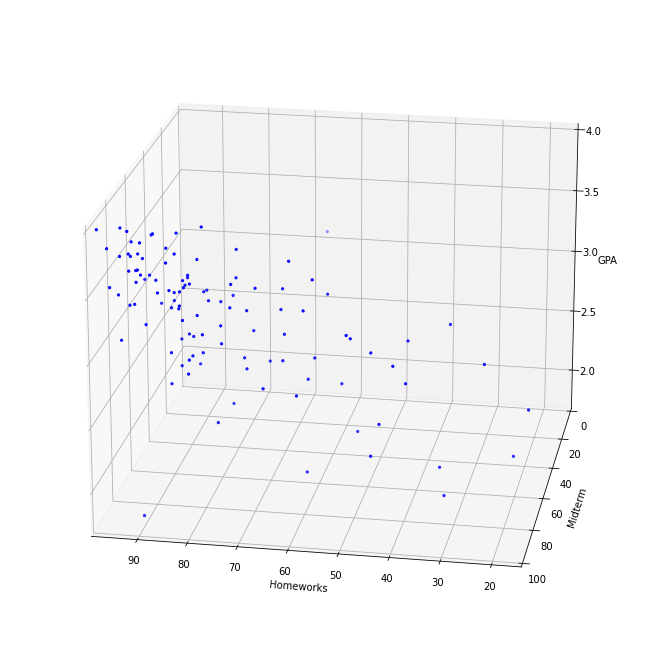

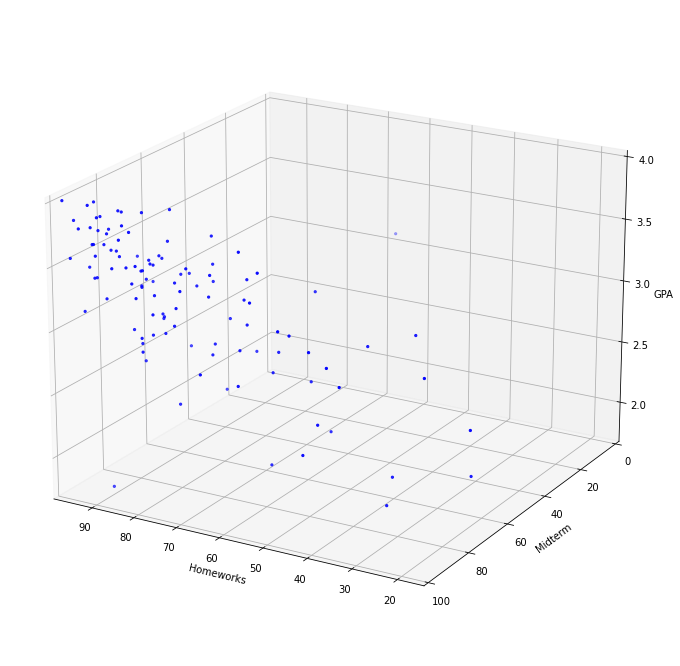

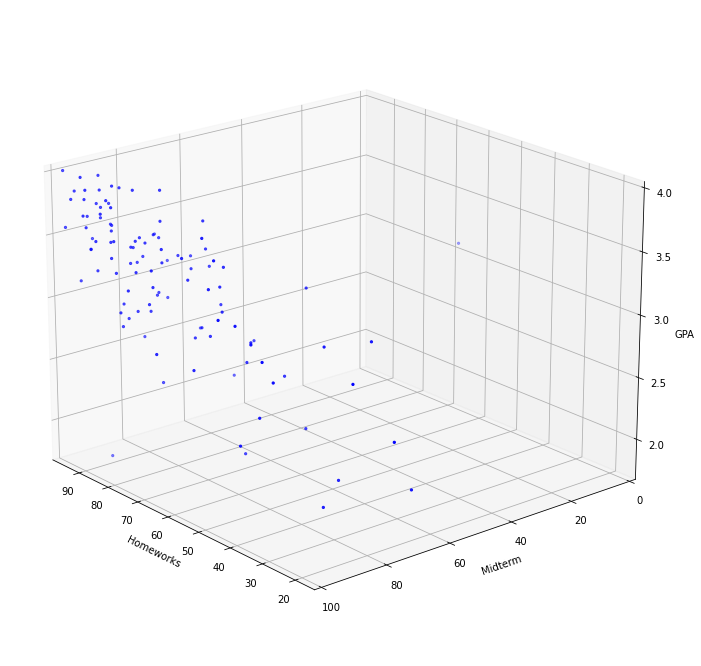

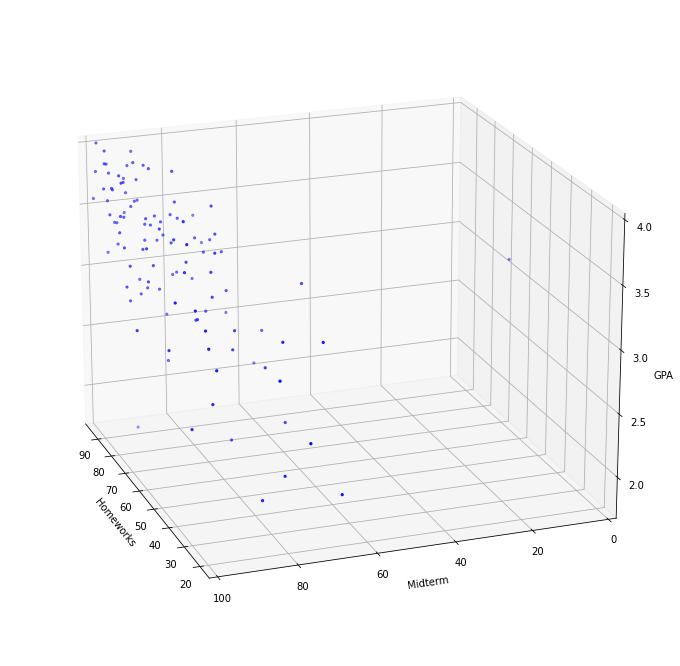

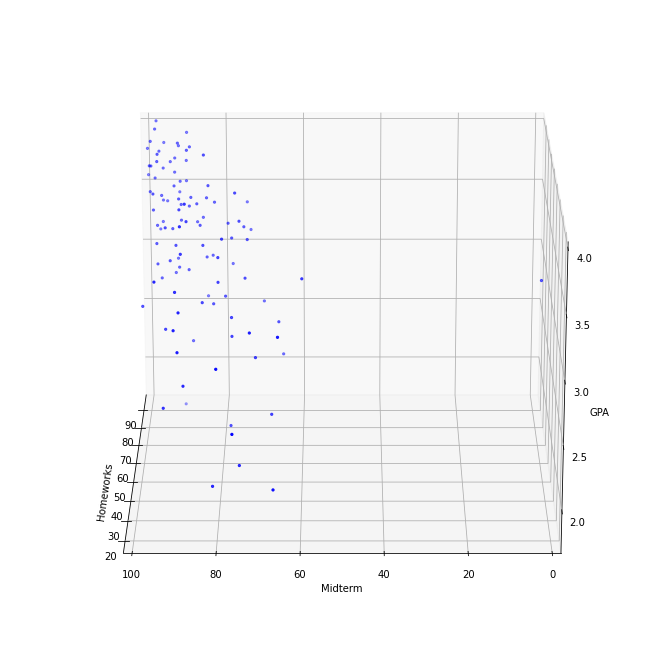

In [19]:
draw_3D_scatter(HWS,MID,GPA,labels=['Homeworks','Midterm','GPA'], reference=False,rot=100)
draw_3D_scatter(HWS,MID,GPA,labels=['Homeworks','Midterm','GPA'], reference=False,rot=120)
draw_3D_scatter(HWS,MID,GPA,labels=['Homeworks','Midterm','GPA'], reference=False,rot=140)
draw_3D_scatter(HWS,MID,GPA,labels=['Homeworks','Midterm','GPA'], reference=False,rot=160)
draw_3D_scatter(HWS,MID,GPA,labels=['Homeworks','Midterm','GPA'], reference=False,rot=180)

## Problem Ten -- Linear Regression

For this problem, in Part A you will simply use the `LinearRegression(X,Y)` function from lecture (in first code cell above!)
that draws a scatterplot, the linear regression line, the midpoint, and the relevant statistics. 

For  Part B you will draw the regression line and residual plot for some data related to a recent class  (anonymous of course!). For Part C you will think about what you are seeing and answer some questions about the data and whether a linear model is appropriate for this data. 


## Part A  (Farentheit vs Celsius)


For this part, simply draw the Farenheit vs Celsius data as shown in lecture. 


In [20]:
Xfarenheit = [45.2, 47.1, 47.5, 49.6, 49.8, 52.0, 54.3, 58.6, 63.2, 64.1] 
Ycelsius = [7.8752, 8.117, 9.2009, 9.3167, 8.4564, 11.4075, 13.9236, 15.0762, 17.4678, 18.4362]


# Your code here

## Part B (GPA vs HWS)

Display the linear regression of the following two data sets, using appropriate title and labels:

     X = GPA
     Y = HWS


In [21]:
# Your code here

## Part C


Looking at the data and the statistics for Part B, answer the following questions to the best of your ability:

<blockquote>
    (i) Just looking at the graphical display of the data, would you think there is
        a linear trend to this data, i.e., is there a correlation between
        GPA and homework scores in CS 237? What do you see?
</blockquote>

<blockquote>
   (ii) Now, what does the $R^2$ value tell you about fitting a linear model to this data?
</blockquote>

Linear regression isn't always appropriate, and not only because of the $R^2$ score.  Please read through the following page outlining the principal conditions necessary for linear regression:

https://www.statisticshowto.datasciencecentral.com/assumptions-conditions-for-regression/

<blockquote>
   (iii) Do you see any other problems, related to the conditions you read about above? (Hint: look at the residual plot).) Can you think of any reason why this might be the case for this data set? (Hint: Just answer these by "eyeballing" the data, don't worry about doing a precise analysis.)
</blockquote>